#Data analysis of financial series

In [4]:
%matplotlib inline
from helpers.data import load_data
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.stattools as sm

In [6]:
y, x = load_data('train.csv')

##Real financial series sample

In [7]:
real_sample = x[1]
y[1]

0

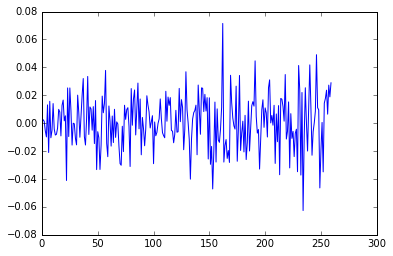

In [20]:
plt.plot(sample)
plt.show()

##Synthetic financial series sample

In [5]:
syn_sample = x[2]
y[2]

1

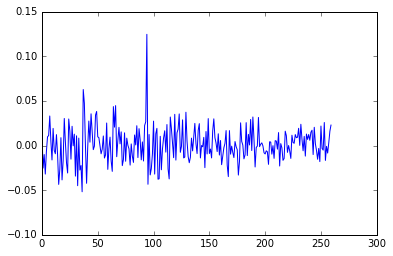

In [22]:
plt.plot(syn_sample)
plt.show()

## Separate real from synthetic

In [10]:
syn_samples = x[np.nonzero(y)]
syn_samples.shape

(6000, 260)

In [11]:
real_samples = x[np.where(y == 0)[0]]
real_samples.shape

(6000, 260)

## Starting with the basics: Mean and standard deviation


In [14]:
def box_plots(real,syn):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))
    
    # Create an axes instance
    ax = fig.add_subplot(111)
    
    data = [real, syn]
    
    # Create the boxplot
    ax.boxplot(data)
    
    plt.show()

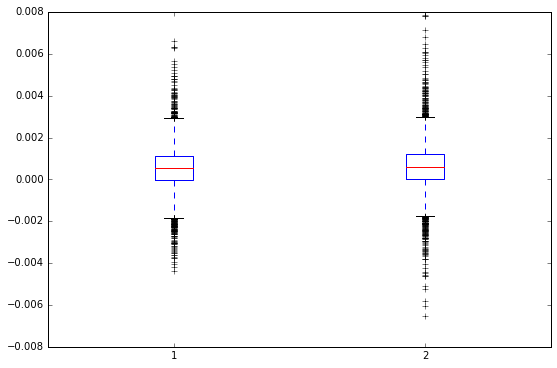

In [85]:
real_means = np.mean(real_samples, axis=1)
syn_means = np.mean(syn_samples, axis=1)
box_plots(real_means,syn_means)

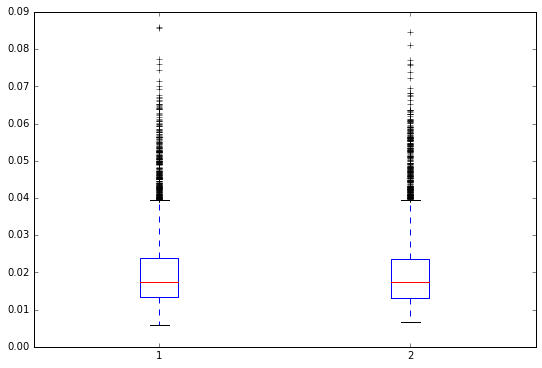

In [86]:
real_std = np.std(real_samples, axis=1)
syn_std = np.std(syn_samples, axis=1)
box_plots(real_std,syn_std)

##Max, min, difference max-min and corr

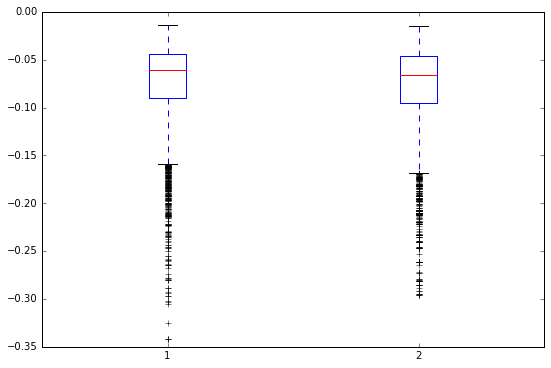

In [ ]:
real_max= np.apply_along_axis(np.max, 1, real_samples)
syn_max = np.apply_along_axis(np.max, 1, syn_samples)
box_plots(real_max, syn_max)

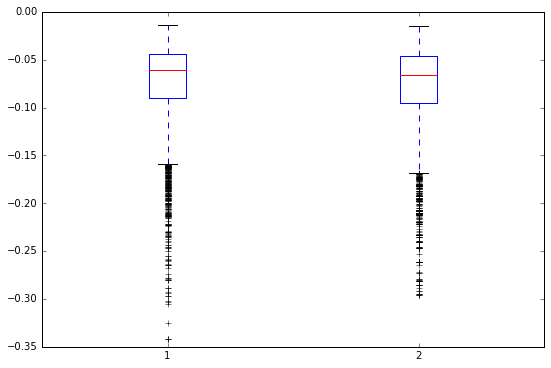

In [95]:
real_min = np.apply_along_axis(np.min, 1, real_samples)
syn_min = np.apply_along_axis(np.min, 1, syn_samples)
box_plots(real_min, syn_min)

In [ ]:
def diff_max_min(row):
    return np.max(row) - np.min(row)
    
real_diff_max_min = np.apply_along_axis(diff_max_min, 1, real_samples)
syn_diff_max_min = np.apply_along_axis(diff_max_min, 1, syn_samples)
box_plots(real_diff_max_min, syn_diff_max_min)

## Durbin-Watson statistic

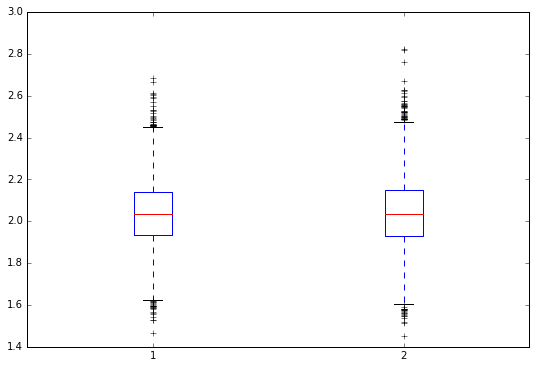

In [88]:
real_dw = np.apply_along_axis(sm.durbin_watson, 1, real_samples)
syn_dw = np.apply_along_axis(sm.durbin_watson, 1, syn_samples)
box_plots(real_dw, syn_dw)

## Stationarity analysis

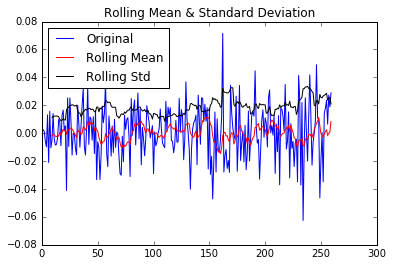

Results of Dickey-Fuller Test:
Test Statistic                -1.608449e+01
p-value                        5.334582e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.590000e+02
Critical Value (10%)          -2.572752e+00
Critical Value (1%)           -3.455853e+00
Critical Value (5%)           -2.872765e+00
dtype: float64


In [111]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=10).mean()
    rolstd = pd.Series(timeseries).rolling(window=10).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

sample = x[0,:]
test_stationarity(real_sample)

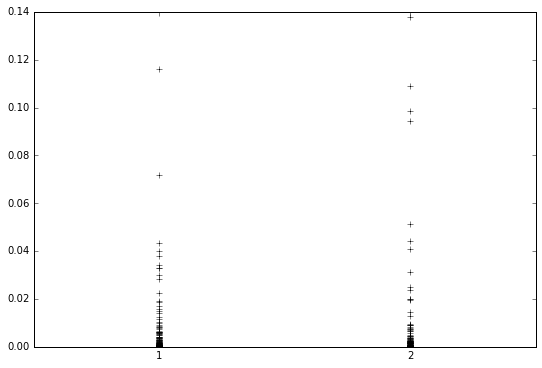

In [ ]:
test_stationarity(syn_sample)

##Decomposing

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import BDay
def print_decomposition (sample):
    timeseries = pd.Series(sample, index=pd.date_range('2017-01-01', '2017-12-31', freq=BDay()))
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(sample, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

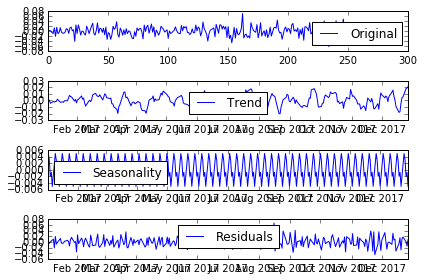

In [154]:
print_decomposition(real_sample)

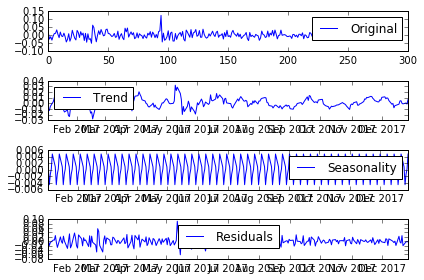

In [155]:
print_decomposition(syn_sample)

In [164]:
def get_residuals (sample):
    timeseries = pd.Series(sample, index=pd.date_range('2017-01-01', '2017-12-31', freq=BDay()))
    decomposition = seasonal_decompose(timeseries)
    return decomposition.resid.dropna().as_matrix()

real_resid = np.apply_along_axis(get_residuals, 1, real_samples)
syn_resid = np.apply_along_axis(get_residuals, 1, syn_samples)

In [161]:
print(real_resid.shape)

(6000, 256)


## Residuals

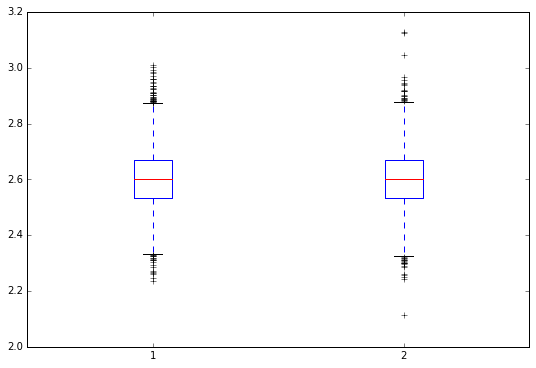

In [164]:
real_resid_dw = np.apply_along_axis(sm.durbin_watson, 1, real_resid)
syn_resid_dw = np.apply_along_axis(sm.durbin_watson, 1, syn_resid)
box_plots(real_resid_dw, syn_resid_dw)

In [ ]:
real_resid_dw = np.apply_along_axis(sm.durbin_watson, 1, real_resid)
syn_resid_dw = np.apply_along_axis(sm.durbin_watson, 1, syn_resid)
box_plots(real_resid_dw, syn_resid_dw)

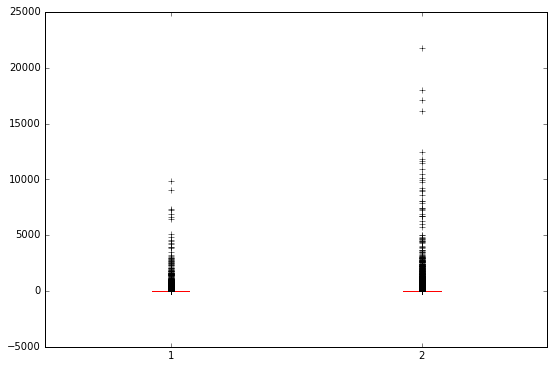

In [165]:
real_resid_jb = np.apply_along_axis(sm.jarque_bera, 1, real_resid)
syn_resid_jb = np.apply_along_axis(sm.jarque_bera, 1, syn_resid)
box_plots(real_resid_jb, syn_resid_jb)

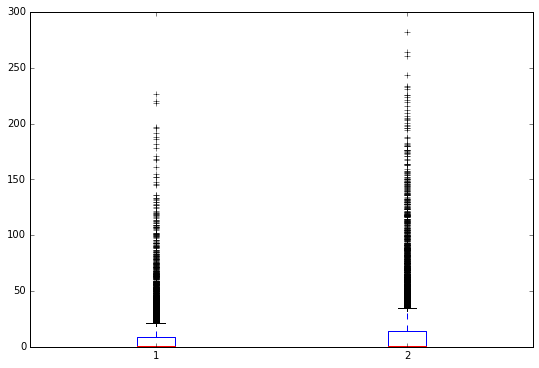

In [166]:
real_resid_omni = np.apply_along_axis(sm.omni_normtest, 1, real_resid)
syn_resid_omni = np.apply_along_axis(sm.omni_normtest, 1, syn_resid)
box_plots(real_resid_omni, syn_resid_omni)

In [28]:
import pandas as pd
def autocorr (timeseries):
    return pd.Series(timeseries).autocorr()

real_autocorr = np.apply_along_axis(autocorr, 1, real_samples)
syn_autocorr = np.apply_along_axis(autocorr, 1, syn_samples)
box_plots(real_autocorr, syn_autocorr)

/home/franxi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


array([             nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
        -1.83544691e-03,  -5.12417881e-04,  -1.19336103e-03,
        -2.17727892e-03,  -2.42359182e-03,  -1.79340750e-03,
        -2.11561423e-03,   7.88670091e-04,  -1.68929460e-03,
         6.31499707e-04,   2.81246991e-03,   1.57446817e-03,
         2.52808156e-03,  -7.30937356e-04,   2.59193380e-03,
         1.98812674e-03,   3.52459709e-03,   3.61337653e-03,
         2.95598490e-03,   1.67805595e-03,  -2.28775440e-05,
        -1.28097183e-03,  -3.36297920e-03,   2.75558742e-03,
         9.91410487e-04,   9.39951453e-04,  -1.12989433e-03,
        -2.13877876e-05,   4.74810682e-03,   3.79197804e-03,
         2.27065487e-03,   3.67323526e-03,   8.57648218e-03,
         5.75765738e-03,   6.15563349e-03,   8.18566865e-03,
         7.22702208e-03,   6.41386594e-03,   1.75029523e-03,
         4.33002145e-03,

## Rolling mean

In [36]:
pd.rolling_mean(real_sample, window=10)

/home/franxi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


array([             nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
        -1.83544691e-03,  -5.12417881e-04,  -1.19336103e-03,
        -2.17727892e-03,  -2.42359182e-03,  -1.79340750e-03,
        -2.11561423e-03,   7.88670091e-04,  -1.68929460e-03,
         6.31499707e-04,   2.81246991e-03,   1.57446817e-03,
         2.52808156e-03,  -7.30937356e-04,   2.59193380e-03,
         1.98812674e-03,   3.52459709e-03,   3.61337653e-03,
         2.95598490e-03,   1.67805595e-03,  -2.28775440e-05,
        -1.28097183e-03,  -3.36297920e-03,   2.75558742e-03,
         9.91410487e-04,   9.39951453e-04,  -1.12989433e-03,
        -2.13877876e-05,   4.74810682e-03,   3.79197804e-03,
         2.27065487e-03,   3.67323526e-03,   8.57648218e-03,
         5.75765738e-03,   6.15563349e-03,   8.18566865e-03,
         7.22702208e-03,   6.41386594e-03,   1.75029523e-03,
         4.33002145e-03,

In [74]:
from tsfresh import extract_features
from pandas.tseries.offsets import BDay

timeseries = pd.DataFrame(columns=['id','time','value'])
for i in range(0,5):
    frames = [timeseries, pd.DataFrame({'id':i, 'time': pd.date_range('2017-01-01', '2017-12-31', freq=BDay()), 'value': real_samples[i]})]
    timeseries = pd.concat(frames)

extracted_features = extract_features(timeseries, column_id='id', column_sort='time', column_value='value')
print(list(extracted_features.columns))


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

['value__quantile__q_0.8', 'value__autocorrelation__lag_4', 'value__median', 'value__autocorrelation__lag_6', 'value__symmetry_looking__r_0.7000000000000001', 'value__number_cwt_peaks__n_1', 'value__approximate_entropy__m_2__r_0.9', 'value__kurtosis', 'value__large_standard_deviation__r_0.4', 'value__mean_abs_change_quantiles__qh_0.4__ql_0.0', 'value__mean_abs_change', 'value__sum_of_reoccurring_values', 'value__mean_abs_change_quantiles__qh_0.4__ql_0.8', 'value__mean_abs_change_quantiles__qh_0.6__ql_0.0', 'value__autocorrelation__lag_9', 'value__mean', 'value__sum_of_reoccurring_data_points', 'value__value_count__value_0', 'value__maximum', 'value__autocorrelation__lag_7', 'value__longest_strike_above_mean', 'value__number_peaks__n_3', 'value__longest_strike_below_mean', 'value__mean_abs_change_quantiles__qh_0.6__ql_0.4', 'value__value_count__value_1', 'value__mean_abs_change_quantiles__qh_0.4__ql_0.4', 'value__symmetry_looking__r_0.9', 'value__value_count__value_inf', 'value__symmetr

In [70]:
import tsfresh
def extract_features(X):
    timeseries = pd.DataFrame(columns=['id','time','value'])
    for i in range(0,len(X)):
        frames = [timeseries, pd.DataFrame({'id':i, 'time': pd.date_range('2017-01-01', '2017-12-31', freq=BDay()), 'value': real_samples[i]})]
        timeseries = pd.concat(frames)
    return tsfresh.extract_features(timeseries, column_id='id', column_sort='time', column_value='value')

6000